# Using Electrocardiographic Results To Help Predict The Presence of Heart Disease


#### Along with ECG results, can we use age, cholesterol, and blood pressure to predict if an individual has heart disease or not?

### Introduction:

##### Background Information:
In the United States, almost half of adults suffer from risk factors leading to heart disease, such as high blood pressure, high cholesterol, and smoking (CDC, 2023). The term “heart disease” is an umbrella term that encompasses several types of diseases like coronary artery disease, heart attack, arrhythmia (fluttering feelings in the chest), heart failure, etc. which has resulted in the death of many.

##### Question: 
The goal of our study is to find the presence of heart disease in a patient. Through this project, we want to evaluate the chosen predictors by using resting electrocardiographic (ECG) results as our classifier. According to the Mayo Clinic (2023), when the heart muscle becomes thickened, it reduces the efficiency of the heart due to a decrease in the amount of blood pumped with each ventricular contraction. This thickening of the heart muscle, also called left ventricular hypertrophic myopathy has been linked to an increased risk of heart attack, stroke, arrhythmia, etc. (MyHealth.Alberta, 2022). Thus, the question we will be trying to address is: By using a classification model of resting ECG, can we use age, cholesterol, and blood pressure to predict if an individual has heart disease or not?
 
##### Dataset description:
The dataset we have chosen is the Heart Disease Dataset from “https://archive.ics.uci.edu/”, which includes 14 attributes. One of the goals of this dataset is to predict if the individual has heart disease or not based on the attributes given.

### Preliminary Exploratory Data Analysis:

In [3]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows=6)

In [4]:
set.seed(1)
#reading the dataset from the URL
heart_disease_data <- read_csv("https://raw.githubusercontent.com/QiXu2022/dsci-100-project-Group_66/main/heart_disease_uci.csv")
heart_disease_data

Rows: 920 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): sex, dataset, cp, restecg, slope, thal
dbl (8): id, age, trestbps, chol, thalch, oldpeak, ca, num
lgl (2): fbs, exang

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>,<lgl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,63,Male,Cleveland,typical angina,145,233,TRUE,lv hypertrophy,150,FALSE,2.3,downsloping,0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160,286,FALSE,lv hypertrophy,108,TRUE,1.5,flat,3,normal,2
3,67,Male,Cleveland,asymptomatic,120,229,FALSE,lv hypertrophy,129,TRUE,2.6,flat,2,reversable defect,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
918,55,Male,VA Long Beach,asymptomatic,122,223,TRUE,st-t abnormality,100,FALSE,0,NA,NA,fixed defect,2
919,58,Male,VA Long Beach,asymptomatic,NA,385,TRUE,lv hypertrophy,NA,NA,NA,NA,NA,NA,0
920,62,Male,VA Long Beach,atypical angina,120,254,FALSE,lv hypertrophy,93,TRUE,0,NA,NA,NA,1


Table 1: Raw Dataset

In [27]:
#tidying the data
tidy_data<-heart_disease_data |>
    filter(dataset=="Cleveland") |>
    select(age, trestbps, chol, restecg) 
tidy_data

age,trestbps,chol,restecg
<dbl>,<dbl>,<dbl>,<chr>
63,145,233,lv hypertrophy
67,160,286,lv hypertrophy
67,120,229,lv hypertrophy
⋮,⋮,⋮,⋮
57,130,236,lv hypertrophy
38,138,175,normal
28,130,132,lv hypertrophy


Table 2: Tidy Data

In [28]:
set.seed(2)
#splitting the data to use the training set
heart_split<- initial_split(tidy_data, prop=0.75, strata=restecg)
heart_train<-training(heart_split)
heart_train

heart_test<-testing(heart_split)

age,trestbps,chol,restecg
<dbl>,<dbl>,<dbl>,<chr>
63,145,233,lv hypertrophy
67,160,286,lv hypertrophy
67,120,229,lv hypertrophy
⋮,⋮,⋮,⋮
44,120,169,normal
57,140,241,normal
68,144,193,normal


Table 3: Training Set

In [31]:
set.seed(3)
#check for how many number of observations and missing data
heart_recipe <- recipe(restecg~., data=tidy_data) |>
    prep()
heart_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

Training data contained 304 data points and no missing data.

In [34]:
#mean
hd_summarize <- heart_train |>
    group_by(restecg ) |>
    summarize(count = n(), age_mean = mean(age), max_age =                        
                   max(age), min_age = min(age), trestbps_mean = mean(trestbps, na.rm = TRUE))
hd_summarize

restecg,count,age_mean,max_age,min_age,trestbps_mean
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
lv hypertrophy,111,56.03604,74,28,135.1171
normal,113,54.10619,71,35,129.1947
st-t abnormality,3,63.00000,76,55,144.6667


In [33]:
#summary tables of training dataset
summary(heart_train)

str(heart_train)

      age           trestbps          chol         restecg         
 Min.   :28.00   Min.   : 94.0   Min.   :126.0   Length:227        
 1st Qu.:48.50   1st Qu.:120.0   1st Qu.:213.0   Class :character  
 Median :56.00   Median :130.0   Median :242.0   Mode  :character  
 Mean   :55.17   Mean   :132.3   Mean   :246.9                     
 3rd Qu.:62.00   3rd Qu.:140.0   3rd Qu.:277.0                     
 Max.   :76.00   Max.   :192.0   Max.   :417.0                     

tibble [227 × 4] (S3: tbl_df/tbl/data.frame)
 $ age     : num [1:227] 63 67 67 41 62 63 53 56 56 58 ...
 $ trestbps: num [1:227] 145 160 120 130 140 130 140 140 130 150 ...
 $ chol    : num [1:227] 233 286 229 204 268 254 203 294 256 283 ...
 $ restecg : chr [1:227] "lv hypertrophy" "lv hypertrophy" "lv hypertrophy" "lv hypertrophy" ...


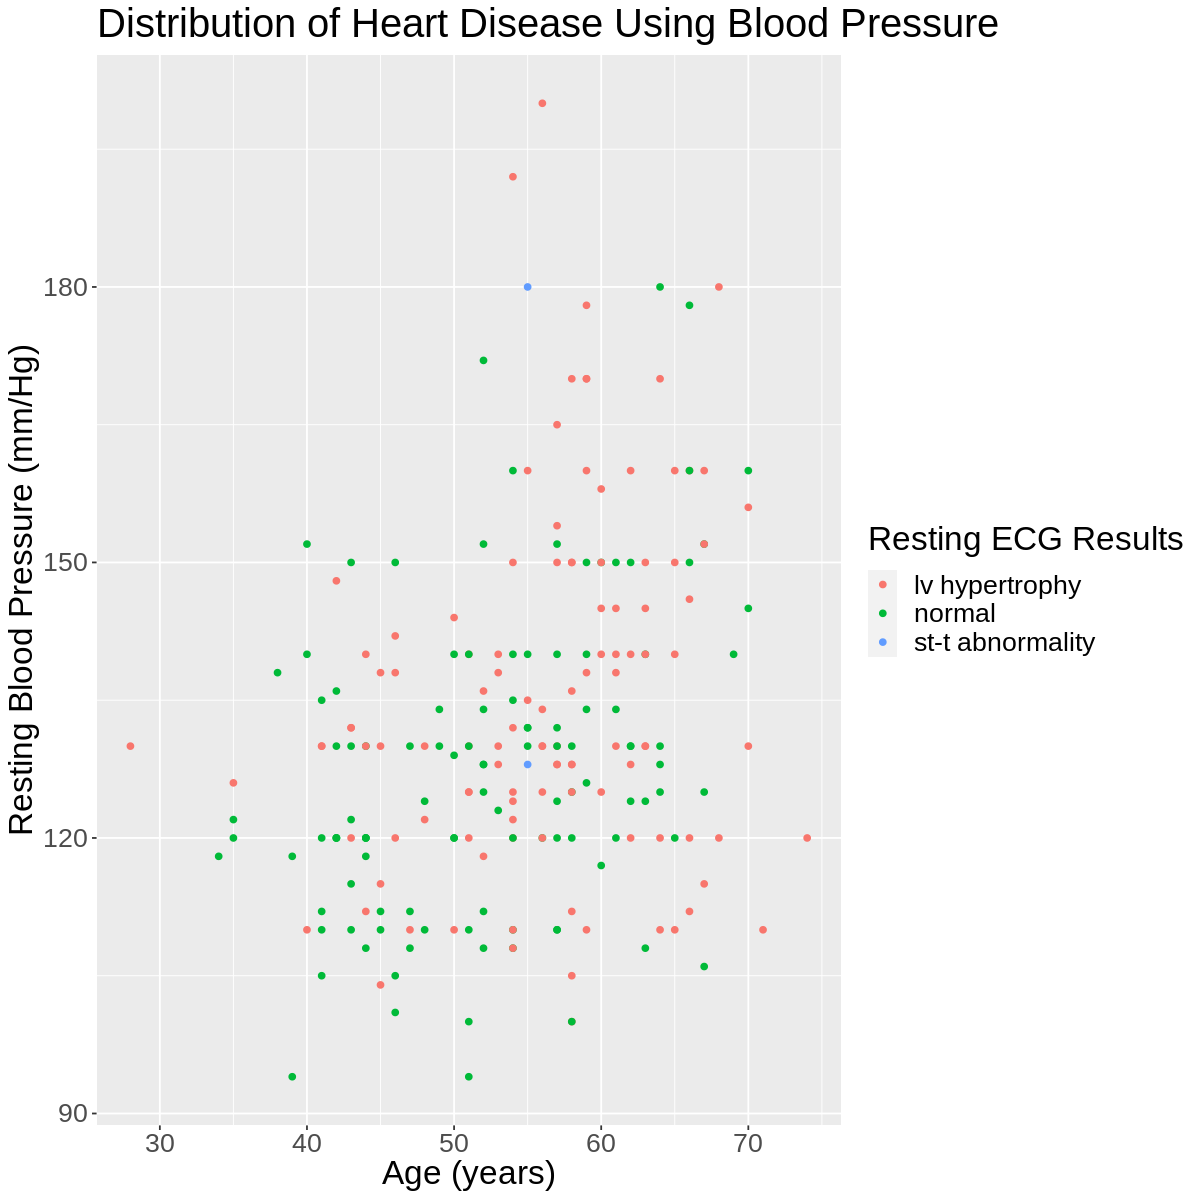

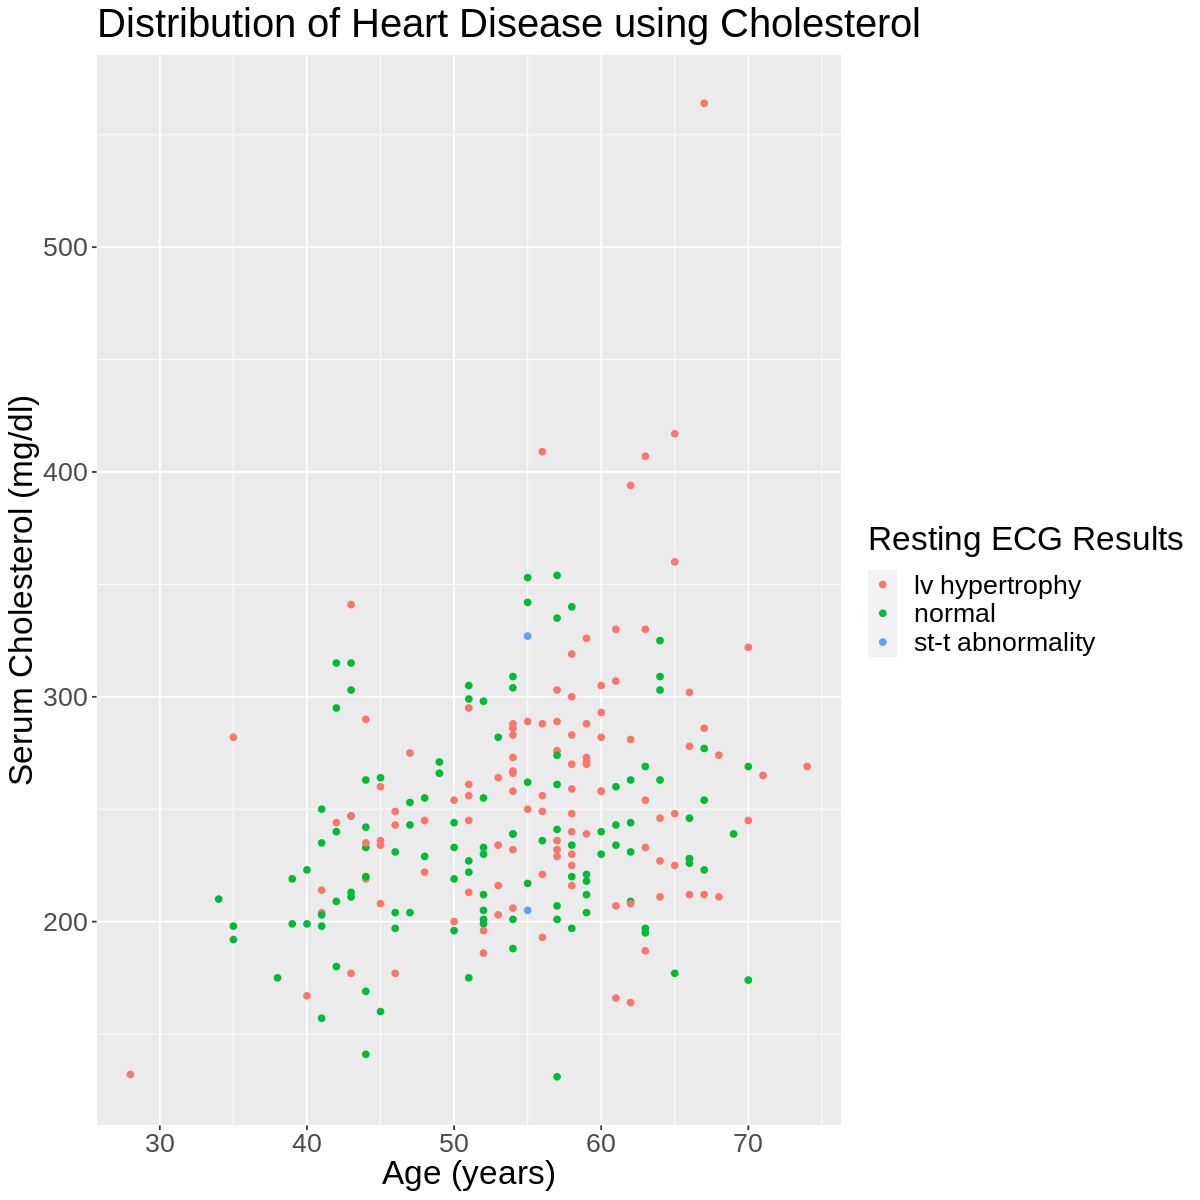

In [26]:
#preliminary exploration plot
options(repr.plot.width=10, repr.plot.height=10)


hd_bp_plot <- ggplot(heart_train, aes(x=age, y = trestbps, colour = restecg )) +
    geom_point() +
    labs(x= "Age (years)", y="Resting Blood Pressure (mm/Hg)", color= "Resting ECG Results")+
    ggtitle("Distribution of Heart Disease Using Blood Pressure") +
    theme(text=element_text(size=20))
hd_bp_plot

hd_chol_plot <- ggplot(heart_train, aes(x=age, y = chol, colour = restecg )) +
    geom_point() +
    labs(x= "Age (years)", y="Serum Cholesterol (mg/dl)", color= "Resting ECG Results")+
    ggtitle("Distribution of Heart Disease using Cholesterol") +
    theme(text=element_text(size=20))
hd_chol_plot

### Methods:


The original dataset was tidied into a new dataset, consisting only of the variables of interest: age, resting blood pressure, cholesterol, and one class: Resting Electrocardiographic Results. These variables were chosen based on our previous background knowledge of factors contributing to heart disease. Using our tidy data, we split our data frame into 75% training and 25% testing. With the training data, we tried to find the distribution of different types of resting ECG results based on different types of body markers: Age vs. Resting Blood Pressure and Age vs. Cholesterol. This was done with scatterplots, with age on the x-axis, either resting blood pressure or cholesterol on the y-axis, and setting the aesthetics coloring for “Resting ECG Results” to classify different types of resting ECG. To predict which class of resting ECG the new observation belongs to, we can use the nearest_neighbor() function to find it.

### Expected Outcomes and Significance:


With our analysis, we will determine whether a person has heart disease or not by using a classification model of resting ECG, and the data of age, cholesterol, and blood pressure. We will expect to find older people, subjects with high resting blood pressure and high cholesterol to have higher abnormal or hypertrophic resting ECG results (which is an indicator of higher chance of heart disease). These findings would contribute and be helpful to the medical field since it would help with diagnoses, resulting in faster treatment.
Some questions this could lead to:
What is the top and main contributor to heart disease?
How can the variables be treated in the future in order to mitigate the chance of heart disease?


### References:

CDC (2023, May 15). “Heart Disease Facts.” Centers for Disease Control and Prevention. https://www.cdc.gov/heartdisease/facts.htm#:~:text=Heart%20disease%20is%20the%20leading,groups%20in%20the%20United%20States.&text=One%20person%20dies%20every%2033,United%20States%20from%20cardiovascular%20disease.&text=About%20695%2C000%20people%20in%20the,1%20in%20every%205%20deaths.

CDC (2023, May 15). “Heart Disease Resources”. Centers for Disease Control and Prevention.
https://www.cdc.gov/heartdisease/about.htm

Public Health Scotland (2020, March 16). “Background and Policy” | Heart Disease. 
https://www.isdscotland.org/Health-Topics/Heart-Disease/Background-and-Policy/#:~:text=Background%20%26%20Policy,-Heart%20Disease%20%26%20Stroke&text=Coronary%20heart%20disease%20(CHD)%20is,attack%2C%20chest%20pain%20or%20angina.

Centers for Disease Control and Prevention. (2023, March 21). Know your risk for heart disease. Centers for Disease Control and Prevention. https://www.cdc.gov/heartdisease/risk_factors.htm 
Learning about left ventricular hypertrophy (LVH). MyHealth.Alberta.ca. Government of Alberta Personal Health Portal. (n.d.). https://myhealth.alberta.ca/Health/aftercareinformation/pages/conditions.aspx?hwid=abr9384&#:~:text=LVH%20is%20linked%20to%20an,can%20help%20reduce%20these%20risks. 


Mayo Foundation for Medical Education and Research. (2023, May 11). Hypertrophic cardiomyopathy. Mayo Clinic. https://www.mayoclinic.org/diseases-conditions/hypertrophic-cardiomyopathy/symptoms-causes/syc-20350198#:~:text=Hypertrophic%20cardiomyopathy%20(HCM)%20is%20a,few%2C%20if%20any%2C%20symptoms 